<a href="https://colab.research.google.com/github/Ravali5/Ravali5.github.io/blob/master/cse519_hw2_Sambu_Ravali_112673000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/'My Drive'/DSF

/content/drive/My Drive/DSF


In [0]:
# Reading train_identity.csv and train_transaction.csv to dataframes
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

Text(0.5, 114.00000000000011, 'distance2')

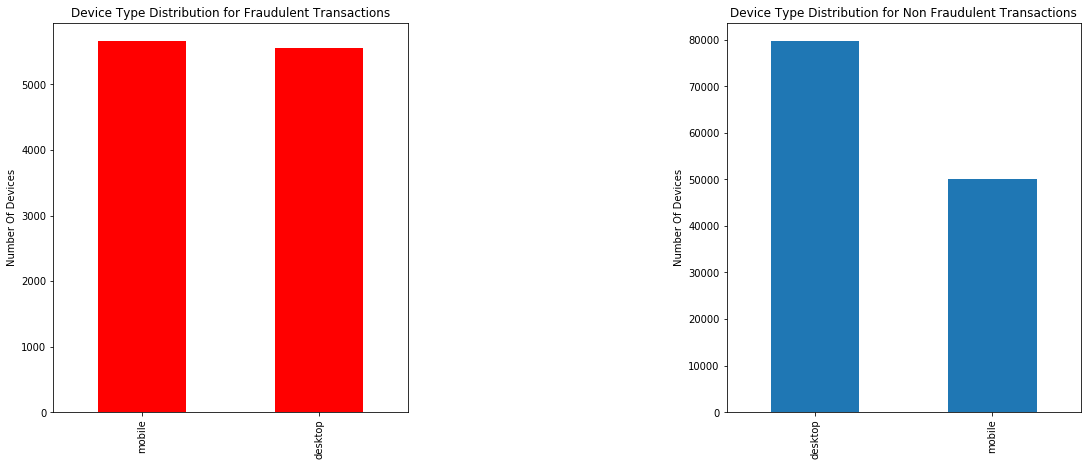

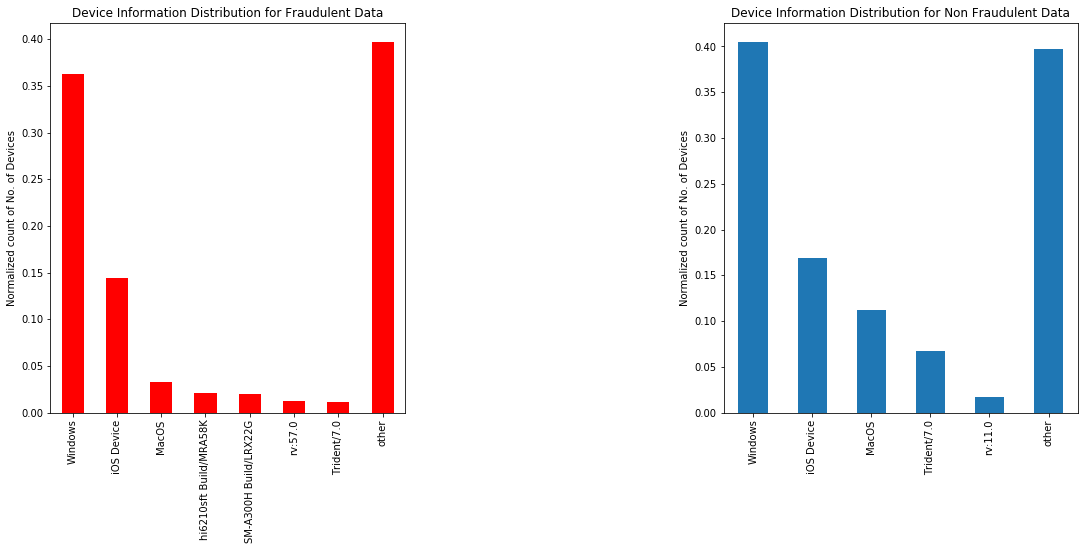

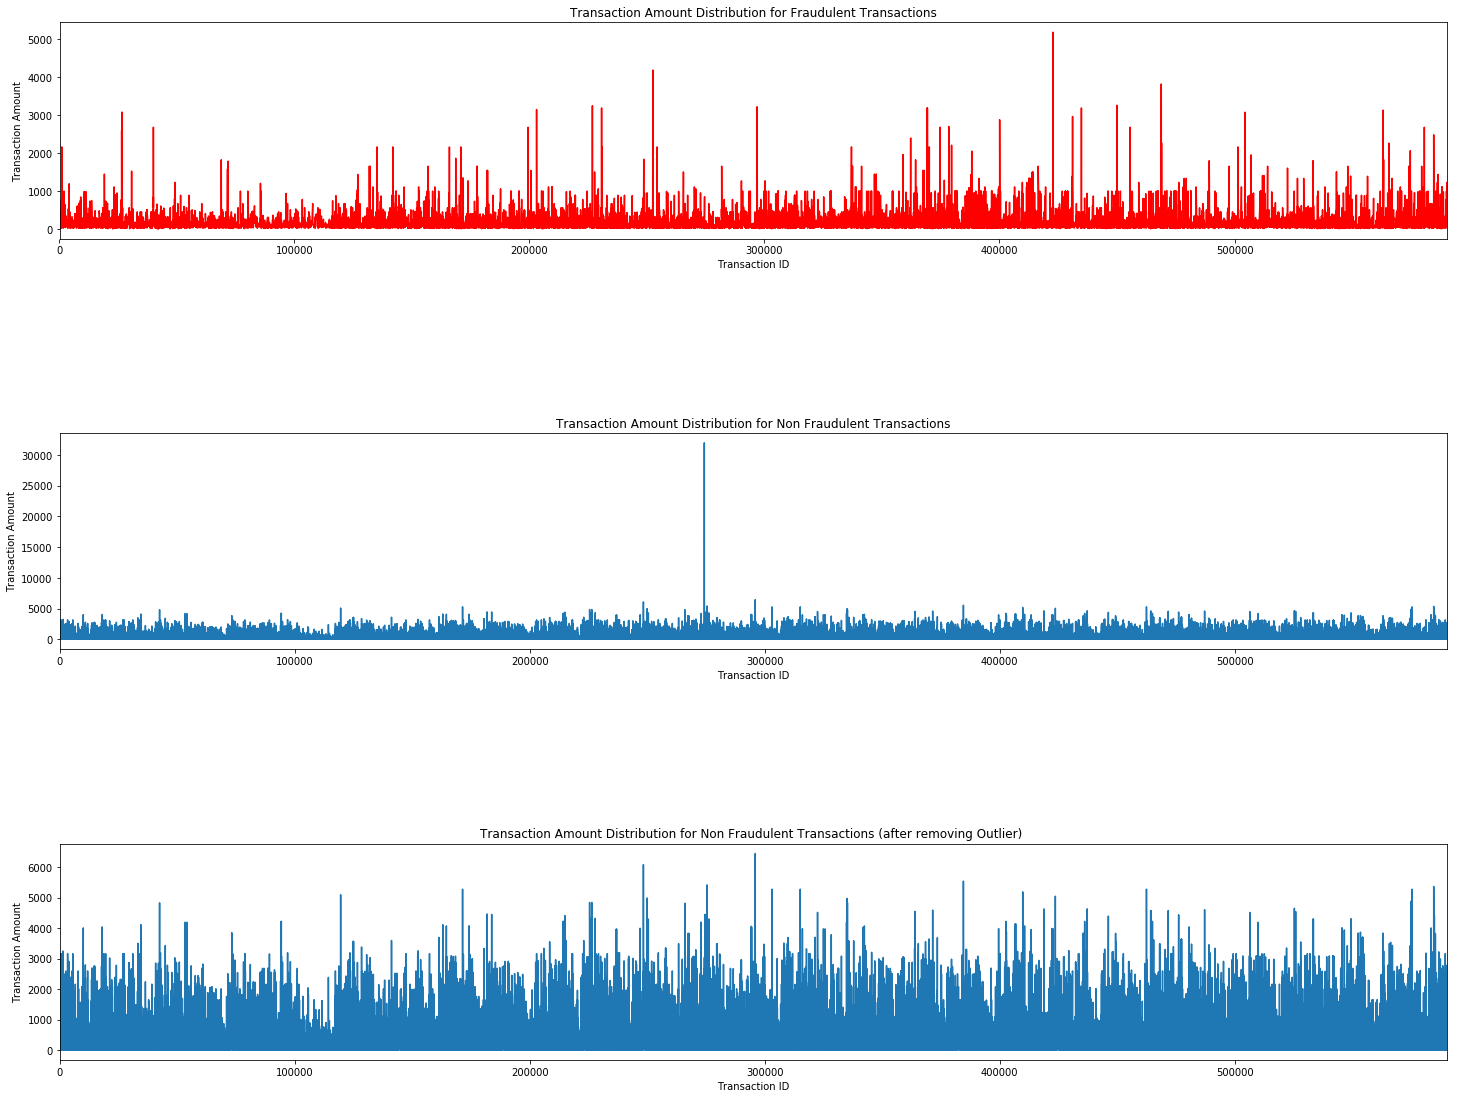

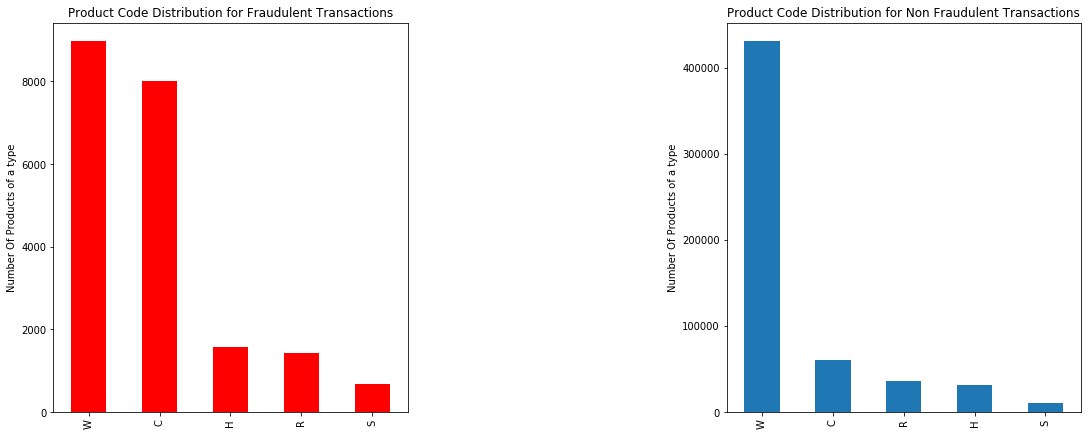

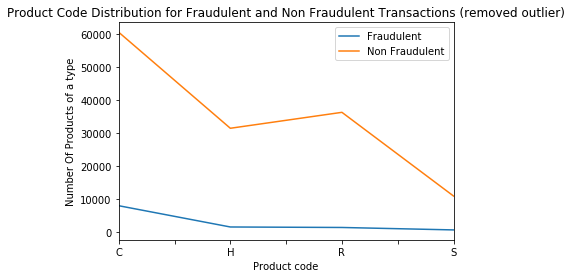

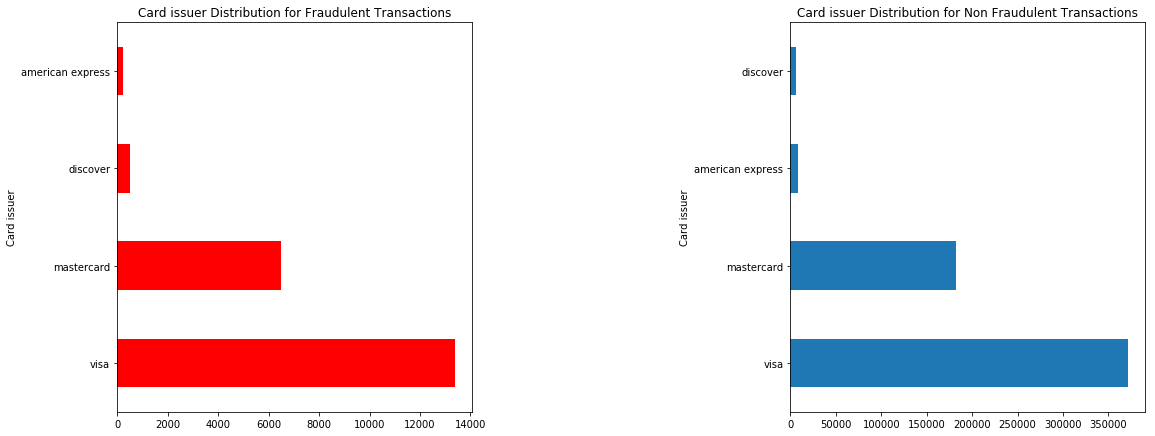

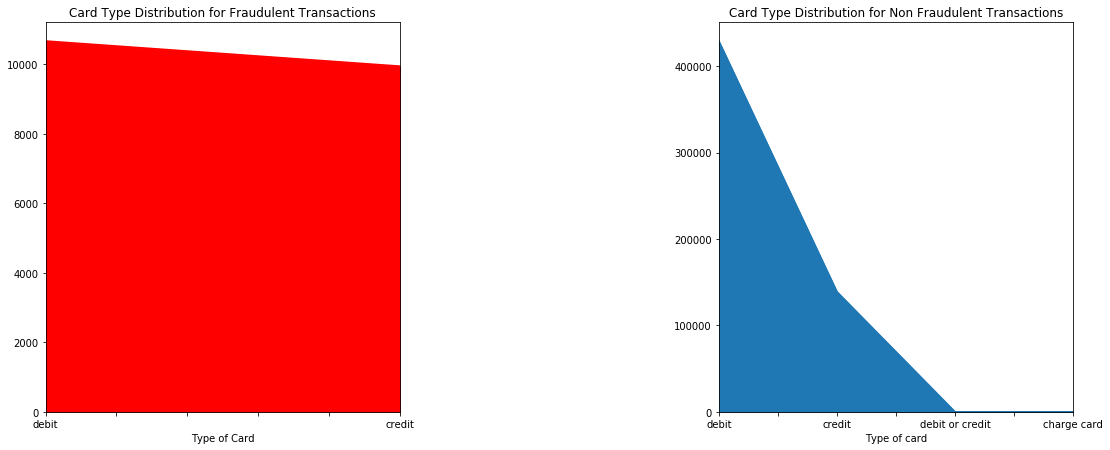

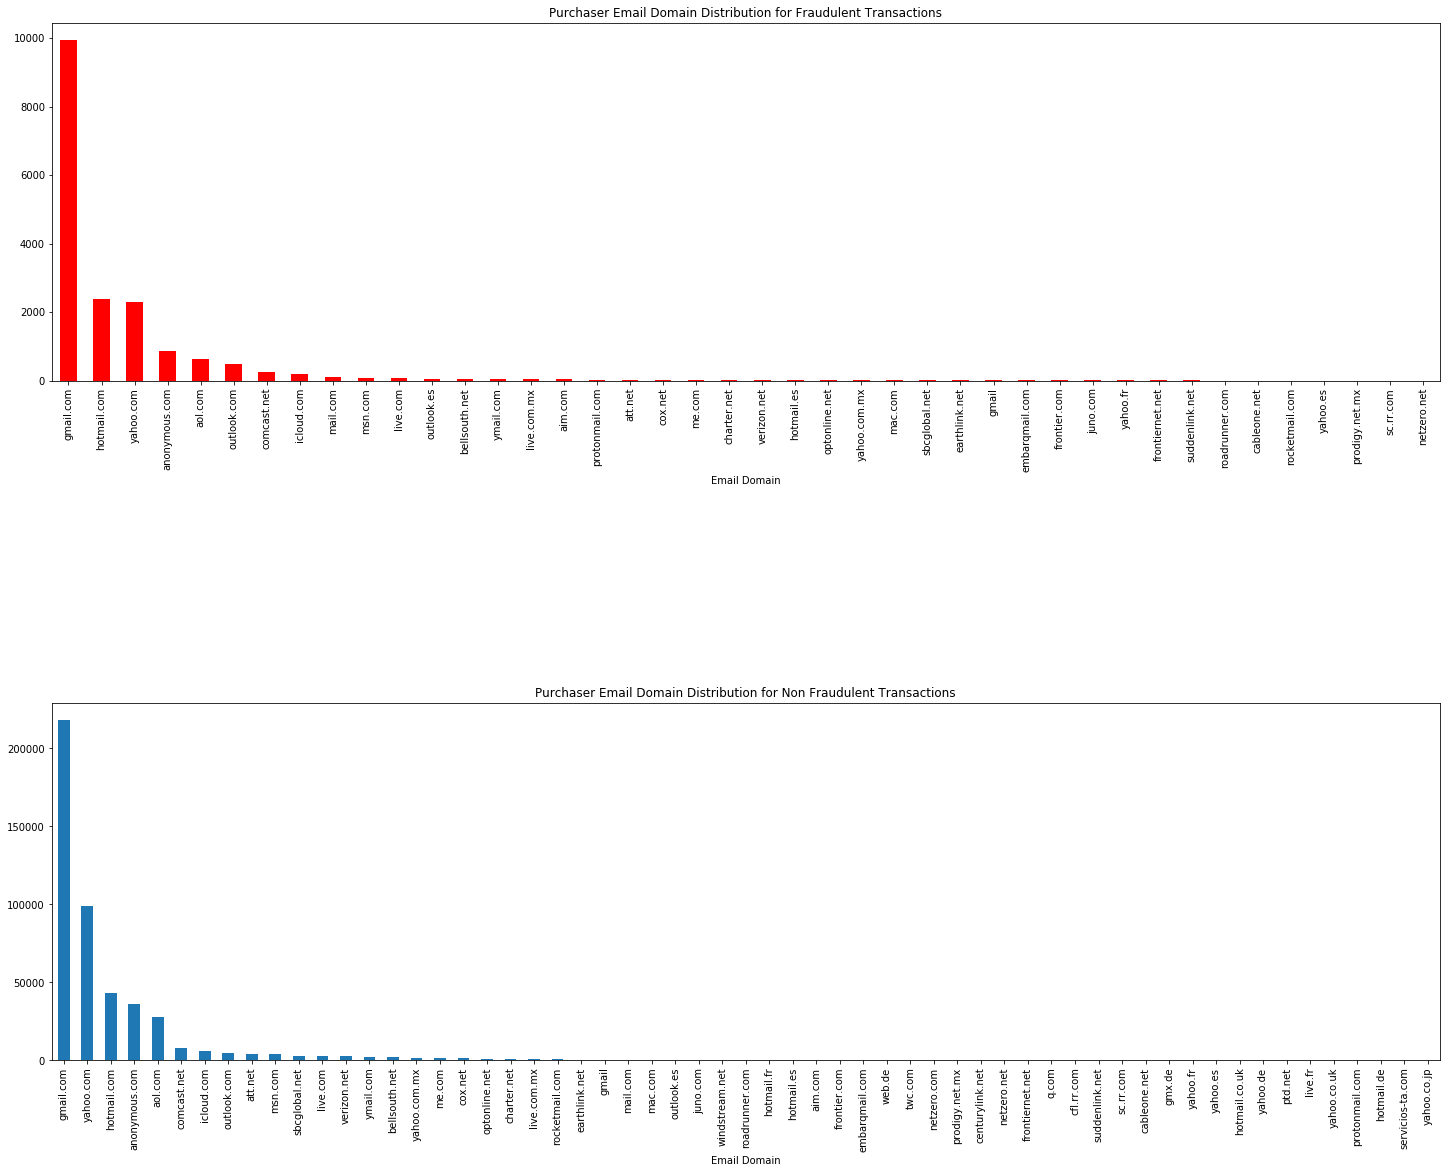

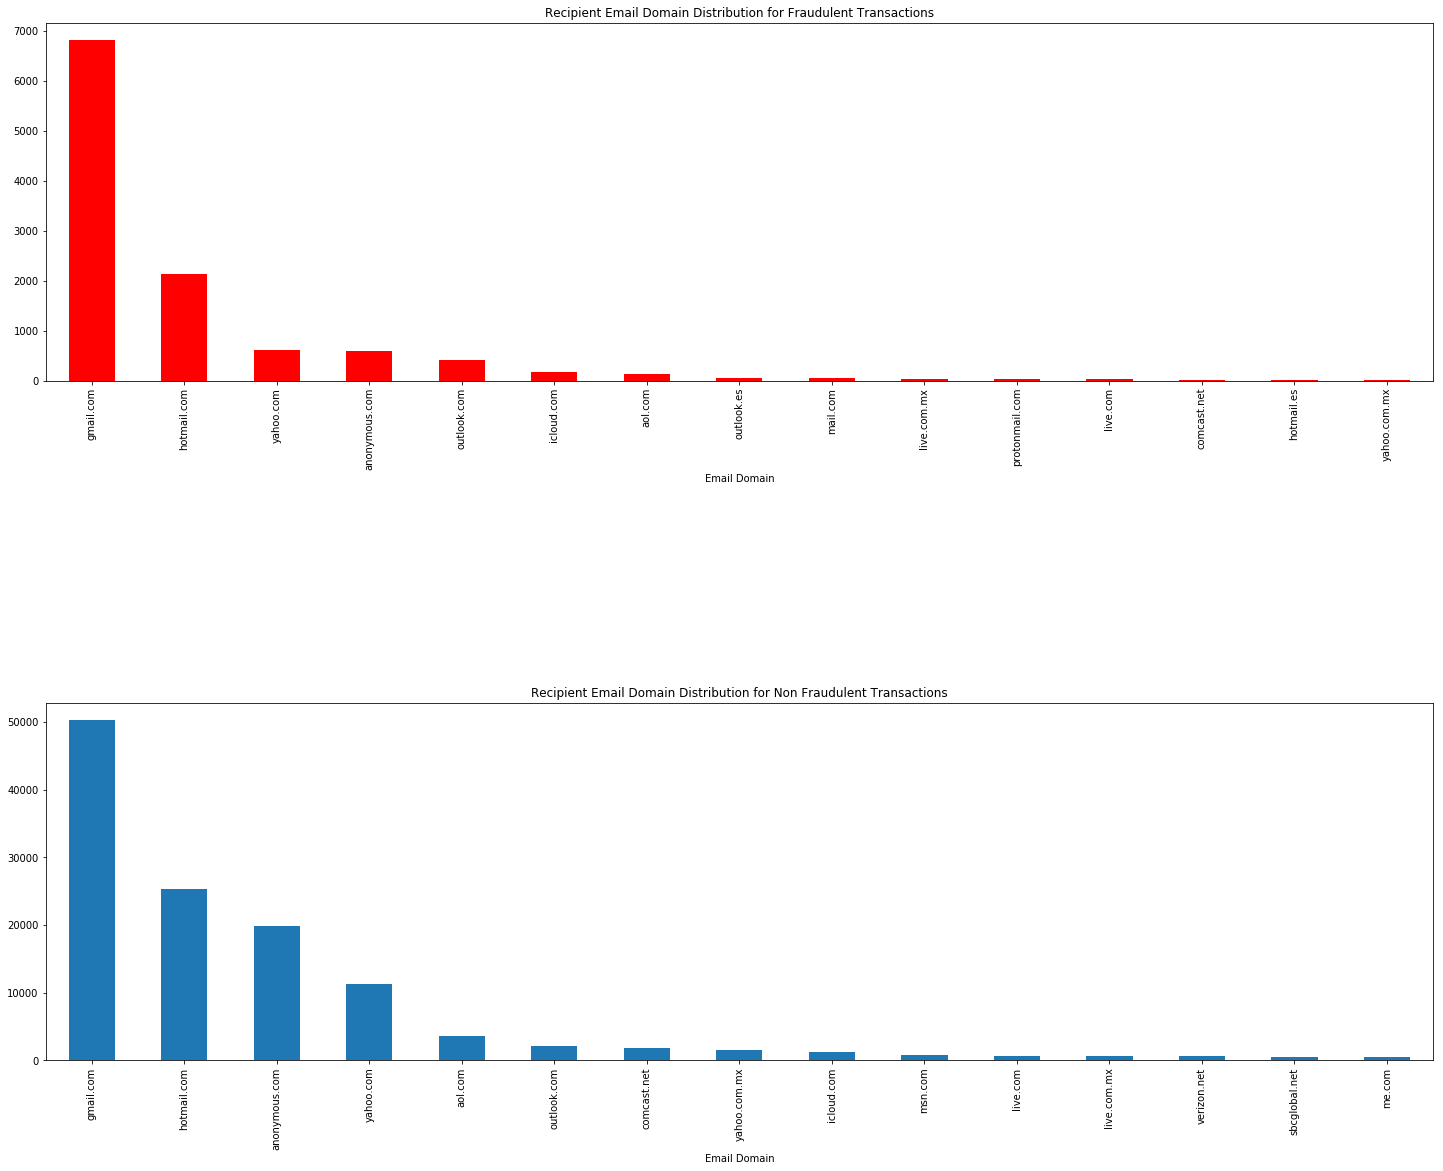

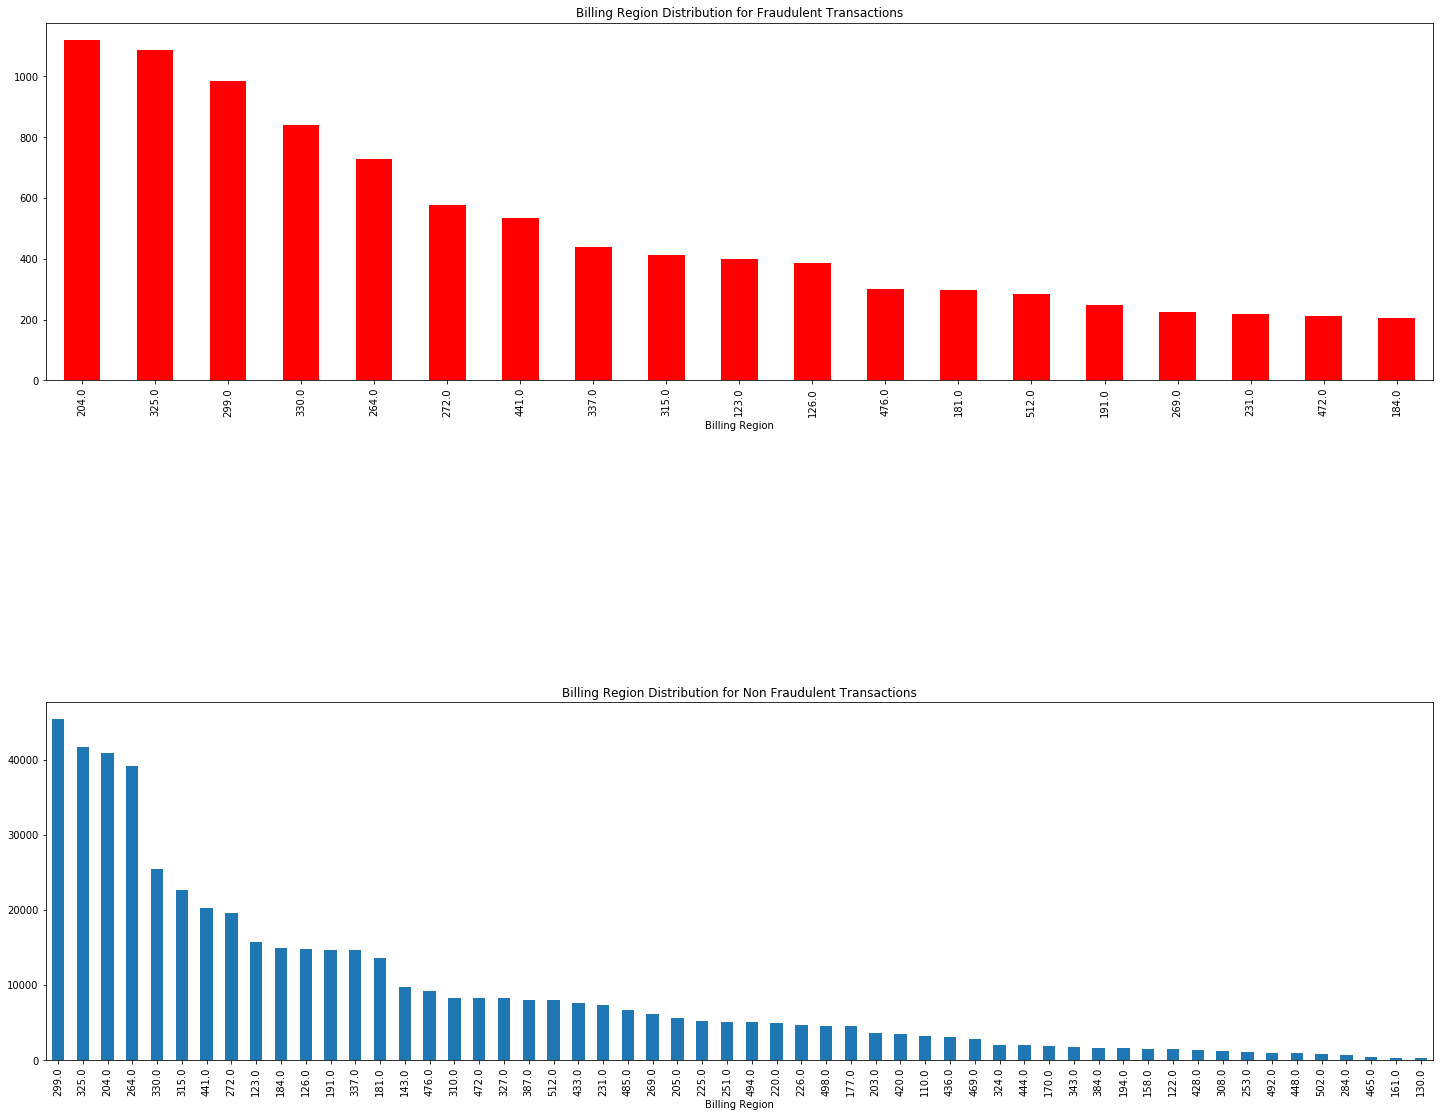

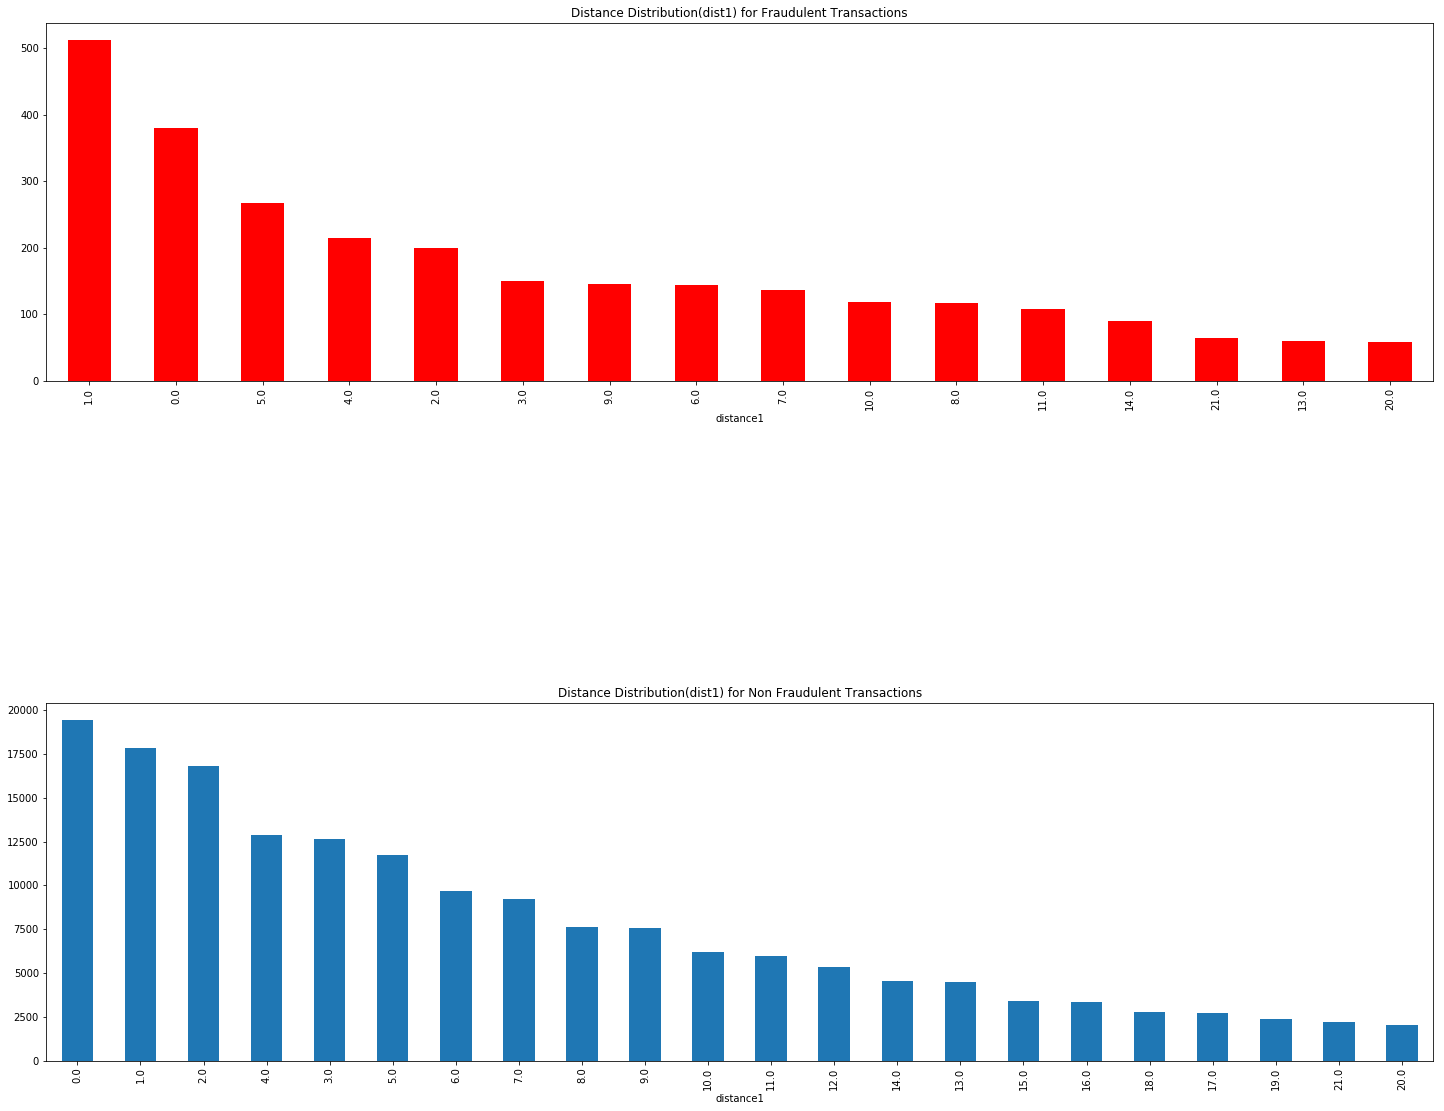

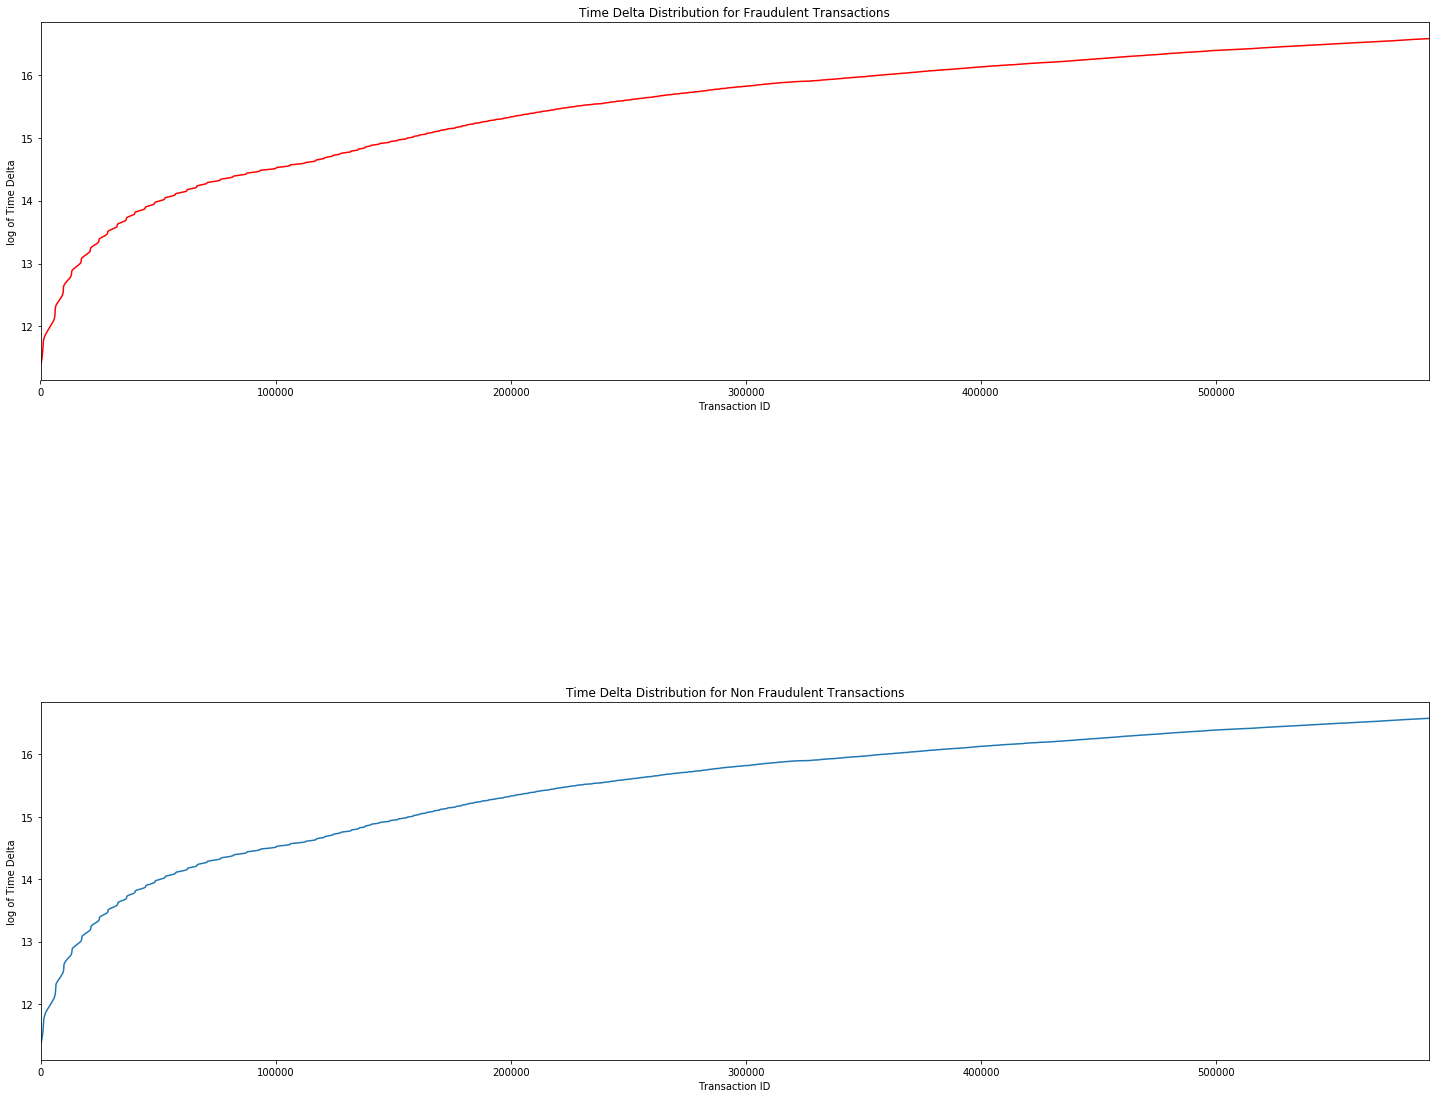

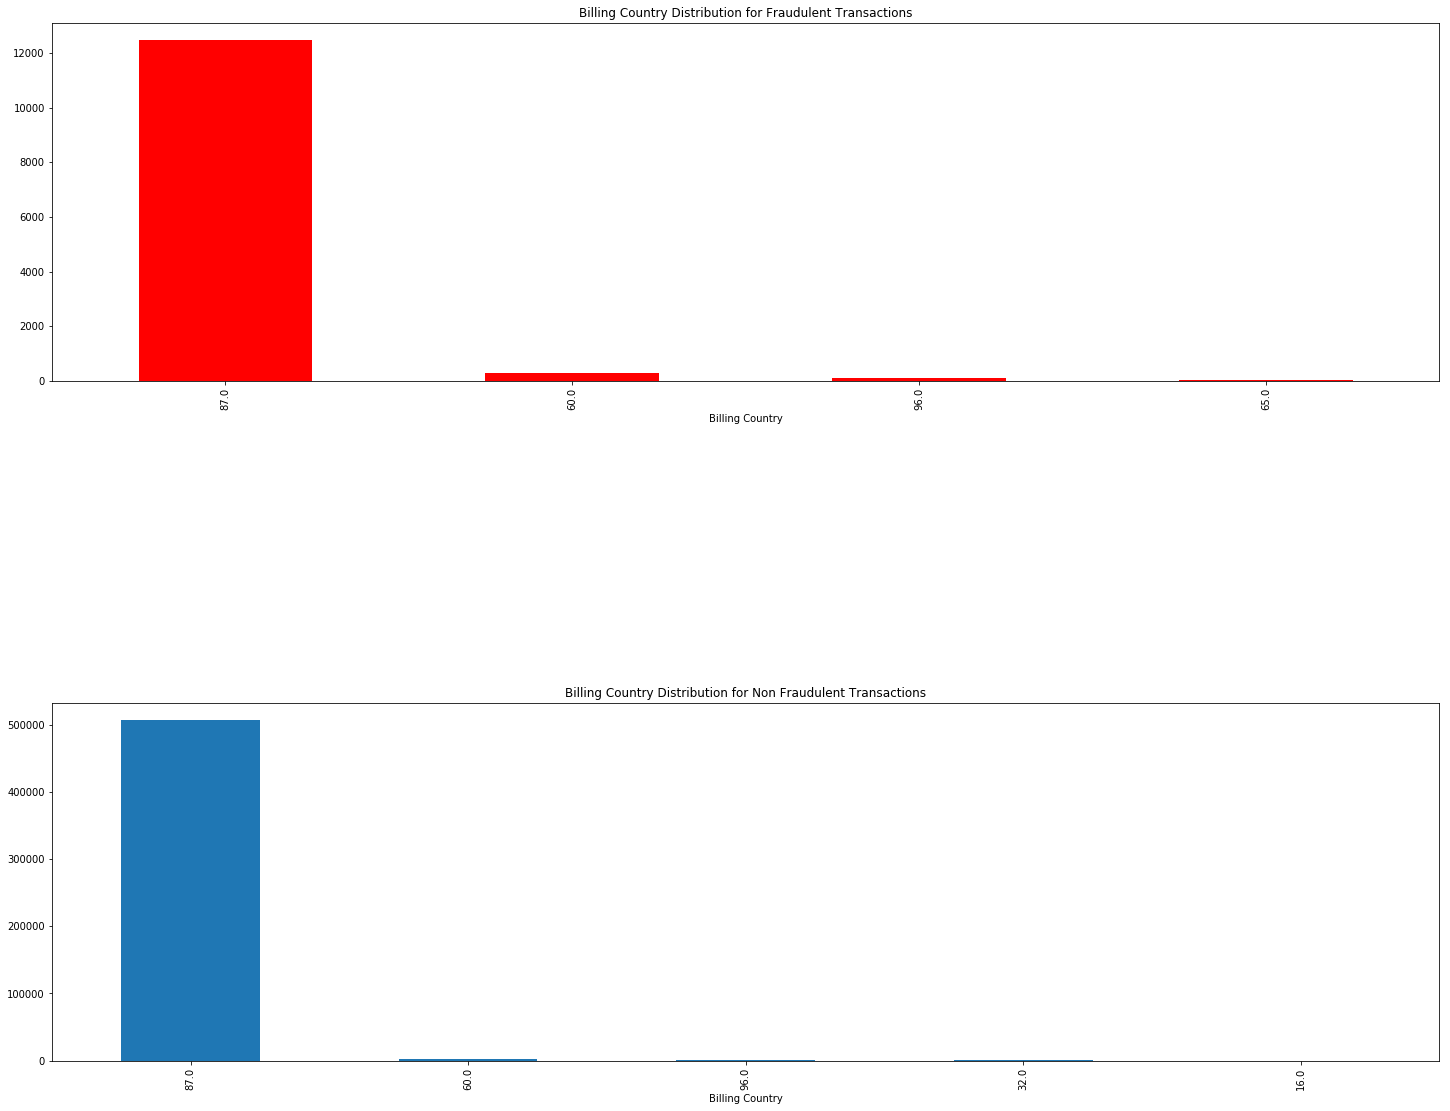

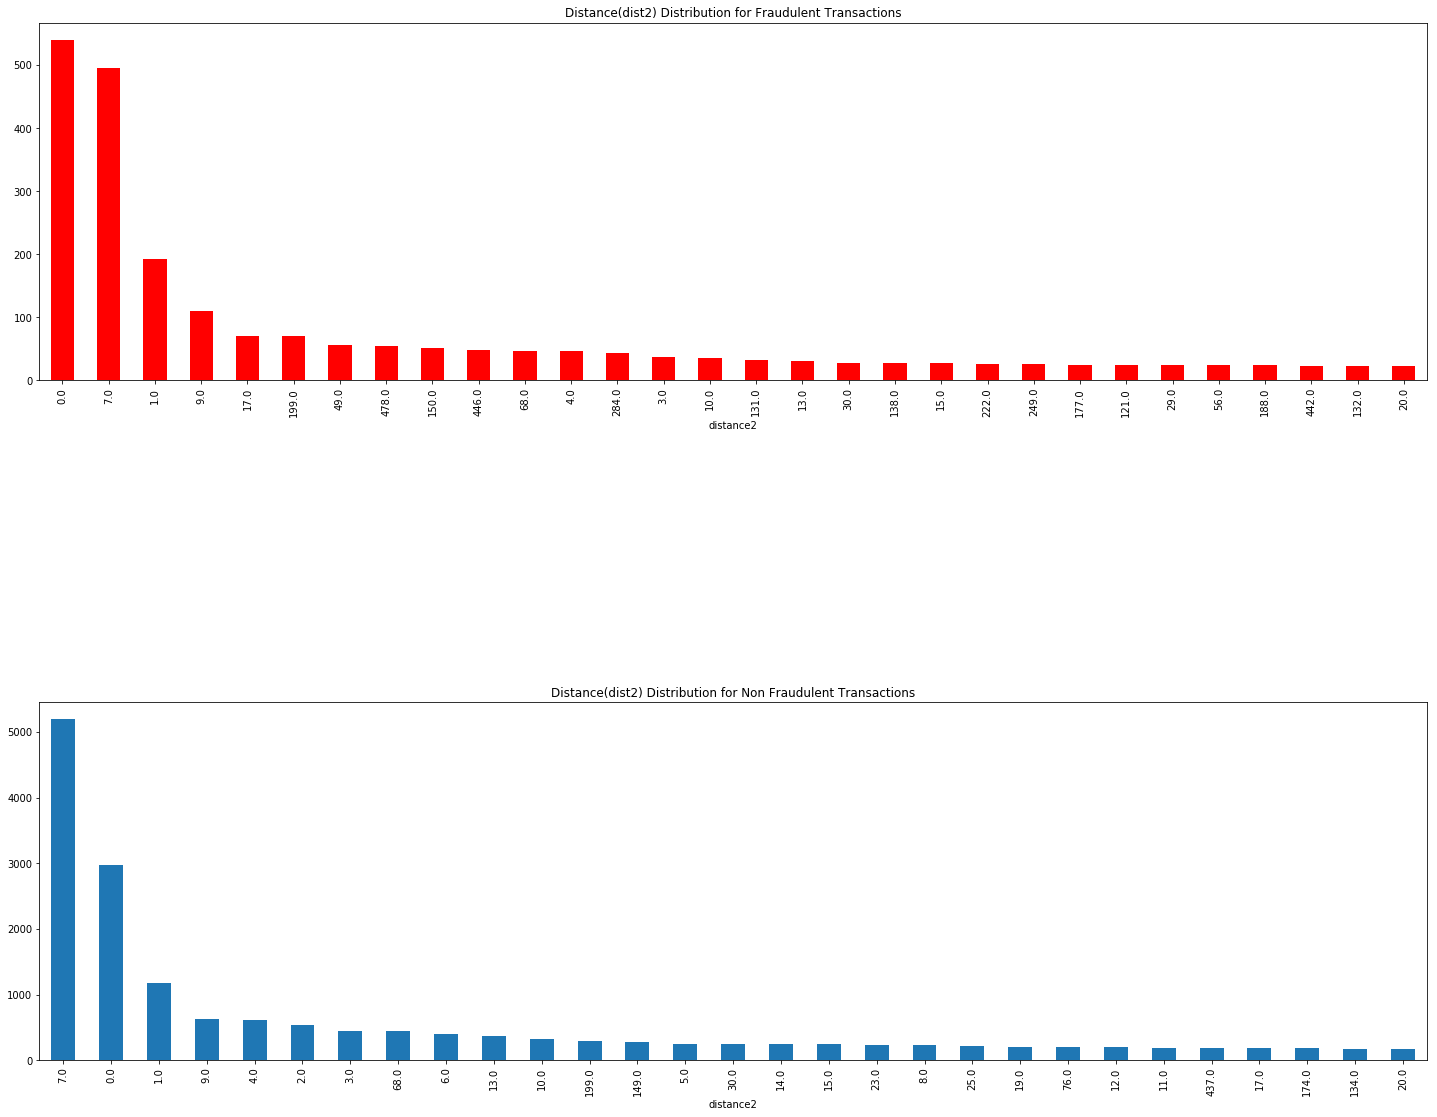

In [0]:
#Left Merging both transaction and identity dataframes 
merged_set=pd.merge(train_transaction,train_identity,on='TransactionID',how='left') 

#choosing only the mentioned columns in document
final_set=merged_set[['TransactionID', 'DeviceType', 'DeviceInfo','isFraud','TransactionDT', 'TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']]

#Creating a seperate dataframe for Non Fraudulent Transactions
NonFradulent=final_set[final_set['isFraud']==0]
SetNF=NonFradulent.loc[:, NonFradulent.columns != 'isFraud']

#Creating a seperate dataframe for Fraudulent Transactions
Fradulent=final_set[final_set['isFraud']==1]
SetF=Fradulent.loc[:, Fradulent.columns != 'isFraud']


#Distribution of DEVICE TYPE

#1. Defining a figure with a size and required number of axes.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
plt.tight_layout()
#2. Adjusting the width space between two graphs(subplots)
plt.subplots_adjust(wspace=0.9)
#3. plotting all device types in fraudulent transactions as bars in Red colour
DTFPlot=SetF['DeviceType'].value_counts().plot.bar(ax=ax1,title="Device Type Distribution for Fraudulent Transactions",color="red")
DTFPlot.set_ylabel("Number Of Devices")
#4. plotting all device types Non-fraudulent transactions as bars in Blue colour beside Fraud Transactions graph
DTNFPlot=SetNF['DeviceType'].value_counts().plot.bar(ax=ax2,title="Device Type Distribution for Non Fraudulent Transactions")
DTNFPlot.set_ylabel("Number Of Devices")

#Distribution of DEVICE INFO

#1. Defining a figure with a size and required number of axes.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
plt.tight_layout()
plt.subplots_adjust(wspace=0.9)
plt.subplots_adjust(hspace=1.5)
#2. creating a series in order to normalize
seriesF = pd.Series(SetF['DeviceInfo'])
#3. normalizing the values so that pattern can be seen more clearly in plot
val_count_normalize = seriesF.value_counts(normalize=True) 
threshold = 0.01
#4. marking some Device Info categories to "Others" Category if they are below threshold
temp = val_count_normalize > threshold
others = val_count_normalize.loc[~temp].sum()
val_count_normalize = val_count_normalize.loc[temp]
val_count_normalize['other'] = others
#5. plotting bars for Device information of Fraudulent transactions
val_count_normalize.plot(ax=ax1,kind='bar',title="Device Information Distribution for Fraudulent Data",color="red").set_ylabel('Normalized count of No. of Devices')
#6. plotting bars for Device Information of Non Fraudulent transactions
seriesNF = pd.Series(SetNF['DeviceInfo'])
val_count_normalize_NF = seriesNF.value_counts(normalize=True)
threshold_NF = 0.01
temp_NF = val_count_normalize_NF > threshold_NF
others_NF = val_count_normalize_NF.loc[~temp_NF].sum()
val_count_normalize_NF = val_count_normalize_NF.loc[temp_NF]
val_count_normalize_NF['other'] = others
val_count_normalize_NF.plot(ax=ax2,kind='bar',title="Device Information Distribution for Non Fraudulent Data").set_ylabel('Normalized count of No. of Devices')

# Distribution for TRANSACTION AMOUNT

#1. Defining a figure with a size and required number of axes.
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20, 15))
plt.tight_layout()
#2. Adjusting the Horizontal space between layouts.
plt.subplots_adjust(hspace=0.9) 
#3. plotting area graph for more clear visualization of Fraudulent Transactions and setting x & y labels
DTFPlot=SetF['TransactionAmt'].plot(ax=ax1,title="Transaction Amount Distribution for Fraudulent Transactions",color="red")
DTFPlot.set_ylabel("Transaction Amount")
DTFPlot.set_xlabel("Transaction ID")
#4. plotting area graph of Transaction amount for more clear visualization of Non Fraudulent Transactions and setting x & y labels
DTNFPlot=SetNF['TransactionAmt'].plot(ax=ax2,title="Transaction Amount Distribution for Non Fraudulent Transactions")
DTNFPlot.set_ylabel("Transaction Amount")
DTNFPlot.set_xlabel("Transaction ID")
#5. plotting the graph after removing outlier so that other distributions can be seen clearly and also setting x & y labels
rmOut=SetNF[SetNF['TransactionAmt']<30000]
DTNFOPlot=rmOut['TransactionAmt'].plot(ax=ax3,title="Transaction Amount Distribution for Non Fraudulent Transactions (after removing Outlier) ")
DTNFOPlot.set_ylabel("Transaction Amount")
DTNFOPlot.set_xlabel("Transaction ID")

#Distribution of PRODUCT CODE

#1. Defining a figure with a size and required number of axes.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
plt.tight_layout()
plt.subplots_adjust(wspace=0.9)
#2. Plotting bar graphs for Number of Products of each type in Fradulent Transactions in Red colour
DTFPlot=SetF['ProductCD'].value_counts().plot.bar(ax=ax1,title="Product Code Distribution for Fraudulent Transactions",color="red")
DTFPlot.set_ylabel("Number Of Products of a type")
#3. Plotting bar graphs for Number of Products of each type in Non Fradulent Transactions in Blue colour
DTNFPlot=SetNF['ProductCD'].value_counts().plot.bar(ax=ax2,title="Product Code Distribution for Non Fraudulent Transactions")
DTNFPlot.set_ylabel("Number Of Products of a type")
#Merged Distribution of Product Type of both Fradulent and Non Fradulent Transactions after removing 'W'- the highest purchased product so that other products distribution can be viewed clearly. 
fcount=SetF['ProductCD'].value_counts()
nfcount=SetNF['ProductCD'].value_counts()
# 1. Removed entries of Product code 'W"'
rmOut=SetNF[SetNF['ProductCD']!='W']
rmcount=rmOut['ProductCD'].value_counts();
rmFOut=SetF[SetF['ProductCD']!='W']
rmfcount=rmFOut['ProductCD'].value_counts();
#2. Created a single dataframe for count of other products for both fraud and Non Fraud transactions
df4 = pd.DataFrame({'Fraudulent': rmfcount, 'Non Fraudulent': rmcount})
#3. Plotted a line for pictorial representation and also set x & y labels
ax = df4.plot(title="Product Code Distribution for Fraudulent and Non Fraudulent Transactions (removed outlier)")
ax.set_ylabel("Number Of Products of a type")
ax.set_xlabel("Product code")

#Distribution of CARD ISSUER(Card4)

#1. Defining a figure with a size and required number of axes.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
plt.tight_layout()
#2. Adjusting the Width between layouts.
plt.subplots_adjust(wspace=0.9)
#3. plotting number of card issuers of each type that are involved in fraudulent transactions as bars in Red colour and also setting a ylabel
DTFPlot=SetF['card4'].value_counts().plot.barh(ax=ax1,title="Card issuer Distribution for Fraudulent Transactions",color="red")
DTFPlot.set_ylabel("Card issuer")
#3. plotting number of card issuers of each type that are involved in Non fraudulent transactions as bars in Blue colour and setting a ylabel
DTNFPlot=SetNF['card4'].value_counts().plot.barh(ax=ax2,title="Card issuer Distribution for Non Fraudulent Transactions")
DTNFPlot.set_ylabel("Card issuer")

#Distribution of CARD TYPE(Card6)

#1. Defining a figure with a size and required number of axes.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
plt.tight_layout()
#2. Adjusting the Width between layouts.
plt.subplots_adjust(wspace=0.9)
#3. plotting number of card types of each category that are involved in fraudulent transactions as area graph in Red colour and also setting a ylabel
DTFPlot=SetF['card6'].value_counts().plot.area(ax=ax1,title="Card Type Distribution for Fraudulent Transactions",color="r")
DTFPlot.set_xlabel("Type of Card")
#3. plotting number of card types of each category that are involved in fraudulent transactions as area graph in Blue colour and also setting a ylabel
DTNFPlot=SetNF['card6'].value_counts().plot.area(ax=ax2,title="Card Type Distribution for Non Fraudulent Transactions")
DTNFPlot.set_xlabel("Type of card")

#Distribution of PURCHASER EMAIL DOMAIN (P_Email Domain)

#1. Defining a figure with a large size and required number of axes.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 15))
plt.tight_layout()
#2. Adjusting the Horizontal space between layouts.
plt.subplots_adjust(hspace=0.9)
#3. plotting number of purchaser email domains that are involved in fraudulent transactions as bars in Red colour and also setting a xlabel
DTFPlot=SetF['P_emaildomain'].value_counts().plot.bar(ax=ax1,title="Purchaser Email Domain Distribution for Fraudulent Transactions",color="r")
DTFPlot.set_xlabel("Email Domain")
#4. plotting number of purchaser email domains that are involved in Non fraudulent transactions as bars in BLue colour and also setting a xlabel
DTNFPlot=SetNF['P_emaildomain'].value_counts().plot.bar(ax=ax2,title="Purchaser Email Domain Distribution for Non Fraudulent Transactions")
DTNFPlot.set_xlabel("Email Domain")

#Distribution of RECIPIENT EMAIL DOMAIN(R_Email Domain)

#1. Defining a figure with a large size and required number of axes.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 15))
plt.tight_layout()
#2. Adjusting the Horizontal space between layouts.
plt.subplots_adjust(hspace=0.9)
#3. plotting the first 15(most freq order) recipient email domains that are involved in fraudulent transactions as bars in Red colour and also setting a xlabel
DTFPlot=SetF['R_emaildomain'].value_counts()[:15].plot.bar(ax=ax1,title="Recipient Email Domain Distribution for Fraudulent Transactions",color="r")
DTFPlot.set_xlabel("Email Domain")
#4. plotting the first 15(most freq order) recipient email domains that are involved in Non fraudulent transactions as bars in Blue colour and also setting a xlabel
DTNFPlot=SetNF['R_emaildomain'].value_counts()[:15].plot.bar(ax=ax2,title="Recipient Email Domain Distribution for Non Fraudulent Transactions")
DTNFPlot.set_xlabel("Email Domain")

#Distribution of BILLING REGION(addr1)

#1. Defining a figure with a large size and required number of axes.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 15))
plt.tight_layout()
#2. Adjusting the Horizontal space between layouts.
plt.subplots_adjust(hspace=0.9)
#3. Droping the NaN values and getting count of No. of transactions  in each billing region for Fraud Set
rmF=SetF['addr1'].dropna().value_counts()
#4. If the count is above 200 plotting bar graphs of those regions that are involved in fraudulent transactions as bars in Red colour and also setting a xlabel
DTFPlot=rmF[rmF>200].plot.bar(ax=ax1,title="Billing Region Distribution for Fraudulent Transactions",color="r")
DTFPlot.set_xlabel("Billing Region")
#5. Droping the NaN values and getting count of No. of transactions  in each billing region for Non Fraud set
rmNF=SetNF['addr1'].dropna().value_counts()
#6. If the count is above 300 plotting bar graphs of those regions that are involved in Non fraudulent transactions as bars in blue colour and also setting a xlabel
DTNFPlot=rmNF[rmNF>300].plot.bar(ax=ax2,title="Billing Region Distribution for Non Fraudulent Transactions")
DTNFPlot.set_xlabel("Billing Region")

#Distribution of DISTANCE (dist1)

#1. Defining a figure with a large size and required number of axes.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 15))
plt.tight_layout()
#2. Adjusting the Horizontal space between layouts.
plt.subplots_adjust(hspace=0.9)
#3. plotting the first 20(most freq order) distances that are involved in fraudulent transactions as bars in Red colour and also setting a xlabel
DTFPlot=SetF['dist1'].value_counts()[:20].plot.bar(ax=ax1,title="Distance Distribution(dist1) for Fraudulent Transactions",color="r")
DTFPlot.set_xlabel("distance1")
#4. plotting the first 20(most freq order) distances that are involved in Non fraudulent transactions as bars in Blue colour and also setting a xlabel
DTNFPlot=SetNF['dist1'].value_counts()[:20].plot.bar(ax=ax2,title="Distance Distribution(dist1) for Non Fraudulent Transactions")
DTNFPlot.set_xlabel("distance1")

#Distribution of TIME DELTA (Transaction DT)

#1. Defining a figure with a large size and required number of axes.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 15))
plt.tight_layout()
#2. Adjusting the Horizontal space between layouts.
plt.subplots_adjust(hspace=0.9)
#3.Taking Log of values to get a symmetrical distribution in plot for fraud Dataset
logF=np.log(SetF['TransactionDT'])
#4. Plotted a line for pictorial representation and also set x & y labels on Fraud DataSet
DTFPlot=logF.plot(ax=ax1,title="Time Delta Distribution for Fraudulent Transactions",color="r")
DTFPlot.set_xlabel("Transaction ID")
DTFPlot.set_ylabel("log of Time Delta")
#5.Taking Log of values to get a symmetrical distribution in plot for Non fraud Dataset
logNF=np.log(SetNF['TransactionDT'])
#6. Plotted a line for pictorial representation and also set x & y labels on Non Fraud DataSet
DTNFPlot=logNF.plot(ax=ax2,title="Time Delta Distribution for Non Fraudulent Transactions")
DTNFPlot.set_xlabel("Transaction ID")
DTNFPlot.set_ylabel("log of Time Delta")

#Distribution of BILLING COUNTRY (addr2)

#1. Defining a figure with a large size and required number of axes.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 15))
plt.tight_layout()
#2. Adjusting the Horizontal space between layouts.
plt.subplots_adjust(hspace=0.9)
#3. Droping the NaN values and getting count of No. of transactions in each billing country for Fraud Set
rmF=SetF['addr2'].dropna().value_counts()
#4. If the count is above 10 plotting bar graphs of those countries that are involved in fraudulent transactions as bars in Red colour and also setting a xlabel
DTFPlot=rmF[rmF>10].plot.bar(ax=ax1,title="Billing Country Distribution for Fraudulent Transactions",color="r")
DTFPlot.set_xlabel("Billing Country")
#5. Droping the NaN values and getting count of No. of transactions in each billing country for Non Fraud Set
rmNF=SetNF['addr2'].dropna().value_counts()
#6. If the count is above 50 plotting bar graphs of those countries that are involved in Non fraudulent transactions as bars in blue colour and also setting a xlabel
DTNFPlot=rmNF[rmNF>50].plot.bar(ax=ax2,title="Billing Country Distribution for Non Fraudulent Transactions")
DTNFPlot.set_xlabel("Billing Country")

#Distribution of DISTANCE (dist2)

#1. Defining a figure with a large size and required number of axes.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 15))
plt.tight_layout()
#2. Adjusting the Horizontal space between layouts.
plt.subplots_adjust(hspace=0.9)
#3. plotting the first 20(most freq order) distances that are involved in fraudulent transactions as bars in Red colour and also setting a xlabel
DTFPlot=SetF['dist2'].value_counts()[:20].plot.bar(ax=ax1,title="Distance(dist2) Distribution for Fraudulent Transactions",color="r")
DTFPlot.set_xlabel("distance2")
#4. plotting the first 20(most freq order) distances that are involved in Non fraudulent transactions as bars in Blue colour and also setting a xlabel
DTNFPlot=SetNF['dist2'].value_counts()[:20].plot.bar(ax=ax2,title="Distance(dist2) Distribution for Non Fraudulent Transactions")
DTNFPlot.set_xlabel("distance2")

# **Inferences from plots of Fradulent vs Non-Fradulent Transactions.**

*1) Device Type*

    From the Device Type Distribution plot we see that count of Fraud Transactions from mobile and desktop are almost equal. Hence We can infer that there is not much dependency on this column for a transaction to be fraud or not. However, most of the Non Fraud transactions are from desktop

*2) Device Info*

    From the Device Info Distribution plot we see that Windows OS is most frequent in case of both fraud and non-fraud transactions. Normalized the values to get the correct comparision with other domains as the data had much divergence.IOS is also second frequently used type for fraud transactions. 

*3) Transaction Amount*

    From the Transaction Amount Distribution plot i can see that most of Fraud transactions have amount less than 1000 and maximum amount might be greater than 5000. And also in Non Fraud set there is an outlier with transaction amount greater than 30000. Plotted a graph by removing the outlier so that other transactions can be visualized in a better way. From the graph of Non Fraud transactions i see that transaction amounts are mostly greater than 2000.
    
*4) Product CD*

    From the **Product Code Distribution** bar graphs we can see that 'W' is the most frequently purchased product and most of the fraud transactions involve products 'W' and 'C'.We can also see that 'S' is least purchased product.
    
*5) Card Issuer*

    From the Card Issuer Distribution bar graphs we can see that 'Visa Card' is most frequently used card. And 'Master Card','Visa card' are most used in case of fraud transactions. On an average we can see we can see that 'Master Card' is more involved in fraud transactions than 'visa card'.
    
*6) Card Type*

    From the Card Type Distribution area graphs we can see that both 'credit' and 'debit' are equally involved in fraud transactions.But when we compared to Non Fraudulent Transactions graph we see that relatively 'Credit card' is mostly involved in fraud transactions than 'debit card'.
    
*7) Purchase Email Domain*

    From the Purchaser Email Domain Distribution plot we can see that gmail.com is most frequently used domains. yahoo.com,hotmail.com are second most frequently used domains specially in case of fraud transactions.Some domains like cox.com and me.com are relatively more in case of fraud when compared to non-fraud transactions.
    
*8) Recipient Email Domain*

    From the Recipient Email Domain Distribution plot also we can see that gmail.com is most frequently used domains. But as the data provided for R_emaildomain is less we can only infer that gmail.com is most used domain in case of fraud transactions.
    
*9) Billing Region*

    From the Billing Region Domain Distribution plot we can see that '204.0' region has most fraudulent transactions happening.'325.0' and '299.0' have almost equal no.transactions as 204. But on comparing Fraudulent and Non Fradulent we see '264.0' region has relatively less no. of fraud transactions
    
*10) Distance(dist1)*

    From the Distance Distribution plot we can see that 1.0 has most fraudulent transactions. As the data given for this column is very less , the analysis may not be accuracte.And at distance 20 we see there are less number of fraud transactions.
    
*11) Transaction Delta*

    From the Transaction Delta Distribution which i have plotted by taking log values , i see that it is increasing across transaction ids .
    
*12) Billing Country*

    From the Billing Country plot we can infer that it 87.0 is the country where more fraud and non-fraud transactions take place. But as the dataset given contains 90% of data with country as 87.0 which is highly dominating i was not able to make much analysis on other countries.  

*13) Distance(dist2)*

    From the Distance(dist2) Distribution plot we can see that 0.0 has most fraudulent transactions and also 7.0 has many fraud transactions. As the data given even for this column is very less , the analysis may not be accuracte. Relatively distance 17 has more fraud transactions when compared with non fraud transactions graph.Write your answer here

## Part 2 - Transaction Frequency

Text(0, 0.5, 'No. of Transactions')

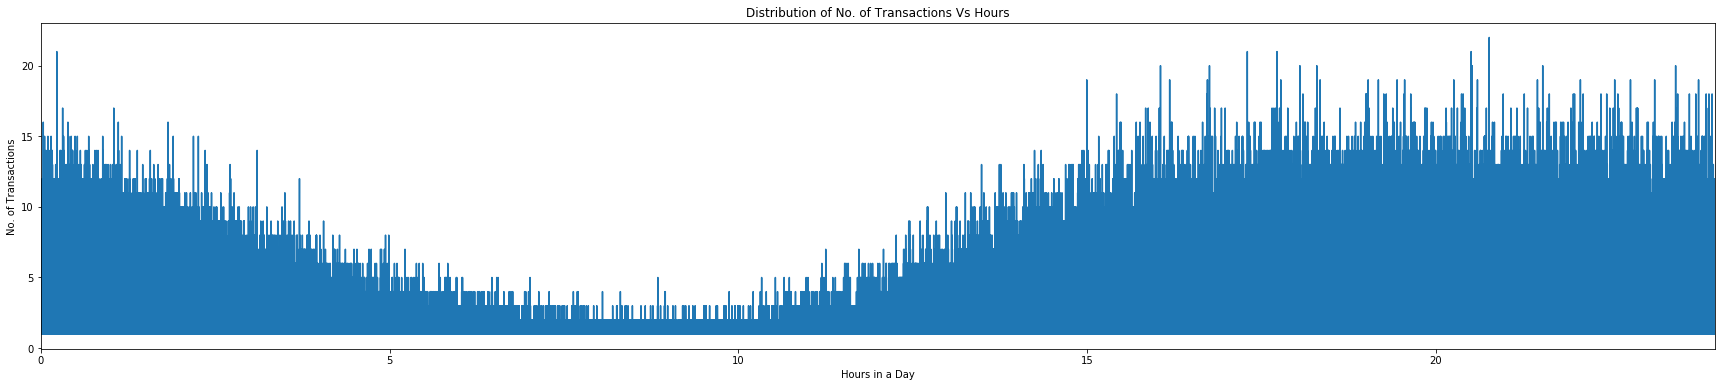

In [0]:
#PART 2
#Finding the waking hours for most frequent country code based on 'addr2' and 'TransactionDT' columns by plotting graph for hours in a day and no. of transactions in a particular hour ,
#so that if there are more no. of transactions seen in a hour it is under waking hours set.

#1. Getting the count for all the countries to find out most freq country which will have more number of transactions
freq=SetNF['addr2'].value_counts()
maxFreqcountry = freq[freq == freq.max()].index[0]
#2. Getting the data of most freq country transactions into a dataframe.
FreqCoun=SetNF[SetNF['addr2']==maxFreqcountry]
#3. Defining the figure size and axis
fig, ax1 = plt.subplots(1,figsize=(30, 6))
#4. Assuming that time delta is given in seconds converting them to hours by dividing the column values with 3600 . Also assuming that reference time is 12 AM(0.0h)
hours=FreqCoun['TransactionDT']/3600
#5. To get the 24 hour cycle taking a mod of hours with 24
RoundedHrs=hours%24
#6. Inorder to plot the values in correct order of hours used sort_index() function.
sortedv=RoundedHrs.value_counts().sort_index()
#7. Plotting the graph between hours obtrained and number of transaction in those hours.
sortedv.plot(ax=ax1,title="Distribution of No. of Transactions Vs Hours").set_xlabel("Hours in a Day")
ax1.set_ylabel("No. of Transactions")

In this I have assumed that values in Transaction Delta are in seconds and converted them to hours by taking mod 24 of value. Plotted a graph of hours vs number of transactions for most frequent country (87.0) . From the graph we can infer that Waking hours are from almost Reference time + 0.0h to Reference time + 3.00h and again from Reference time + 14.00 to Reference time + 0.0Write your answer here

## Part 3 - Product Code

Text(0, 0.5, 'Normalized mean values')

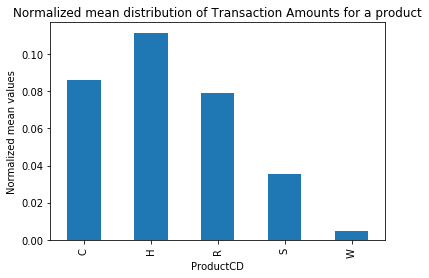

In [0]:
#PART 3
#Plot to find which product is expensive and which product is cheapest.

#1. As the Transaction Amount given in dataset is highly different for different transaction IDs for a same product, Normalizing the values
SetNF['Nom']=SetNF.groupby('ProductCD')['TransactionAmt'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
#2. Then found out the mean
meanNF=SetNF.groupby('ProductCD').mean()
#3. Plotted the graph based on the mean of normalized values to see which product is cheapest and which is expensive.
meanNF['Nom'].plot.bar(title="Normalized mean distribution of Transaction Amounts for a product").set_ylabel("Normalized mean values")

In this part i have normalized Transaction amounts initially because i see that for same products there are different transaction amounts. SO after getting them to same scale i have taken the mean of values for every product and i see that **H is expensive and W is cheapest**

## Part 4 - Correlation Coefficient

In [0]:
#Part 4
#correlation coefficient after considering all individual Transaction Amounts ( as most of the transactions are from 87.0 country considering the set that has 87.0 as addr2)

freq=SetNF['addr2'].value_counts()
maxFreqcountry = freq[freq == freq.max()].index[0]
FreqCoun=SetNF[SetNF['addr2']==maxFreqcountry]
#calculating hours of the day 
hours=FreqCoun['TransactionDT']/3600
FreqCoun['TimeOfDay']=hours.round()%24
#Finding correlation between transaction Amount in that hour and a  particular hour 
ind=FreqCoun[['TimeOfDay','TransactionAmt']].corr()


#correlation coefficient after considering purchase amount to be sum of transaction amounts in that hour

freq=SetNF['addr2'].value_counts()
maxFreqcountry = freq[freq == freq.max()].index[0]
FreqCoun=SetNF[SetNF['addr2']==maxFreqcountry]
hours=FreqCoun['TransactionDT']/3600
FreqCoun['TimeOfDay']=hours.round()%24
#summing up all the transaction amounts in a particular hour and finding the correlation with that hour.
FreqCoun.groupby('TimeOfDay')['TransactionAmt'].sum()
x=[]
y=[]
for i in FreqCoun['TimeOfDay'].dropna().unique():
  x.append(i)
  y.append(FreqCoun.groupby('TimeOfDay')['TransactionAmt'].sum()[i])
df=pd.DataFrame({'TimeOfDay':x,'PurchaseAmt': y})
print(df.corr())
print(ind)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


             TimeOfDay  PurchaseAmt
TimeOfDay     1.000000     0.591199
PurchaseAmt   0.591199     1.000000
                TimeOfDay  TransactionAmt
TimeOfDay        1.000000        0.039765
TransactionAmt   0.039765        1.000000


From the above grid,the correlation coefficient after considering all individual Transaction Amounts ( as most of the transactions are from 87.0 country considering the set that has 87.0 as addr2) is **0.039**

the correlation coefficient after considering sum of individual Transaction Amounts in a particular hour as purchase amount is **0.591**Write your answer here

## Part 5 - Interesting Plot

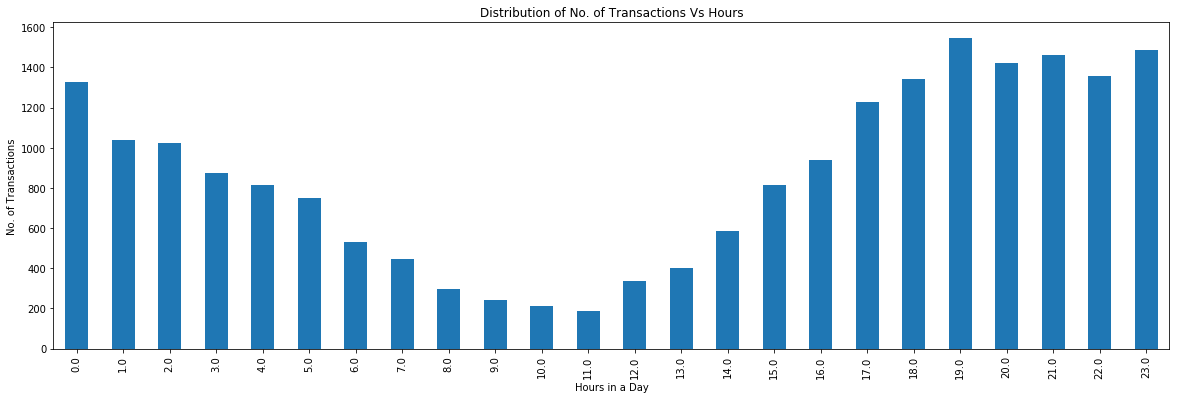

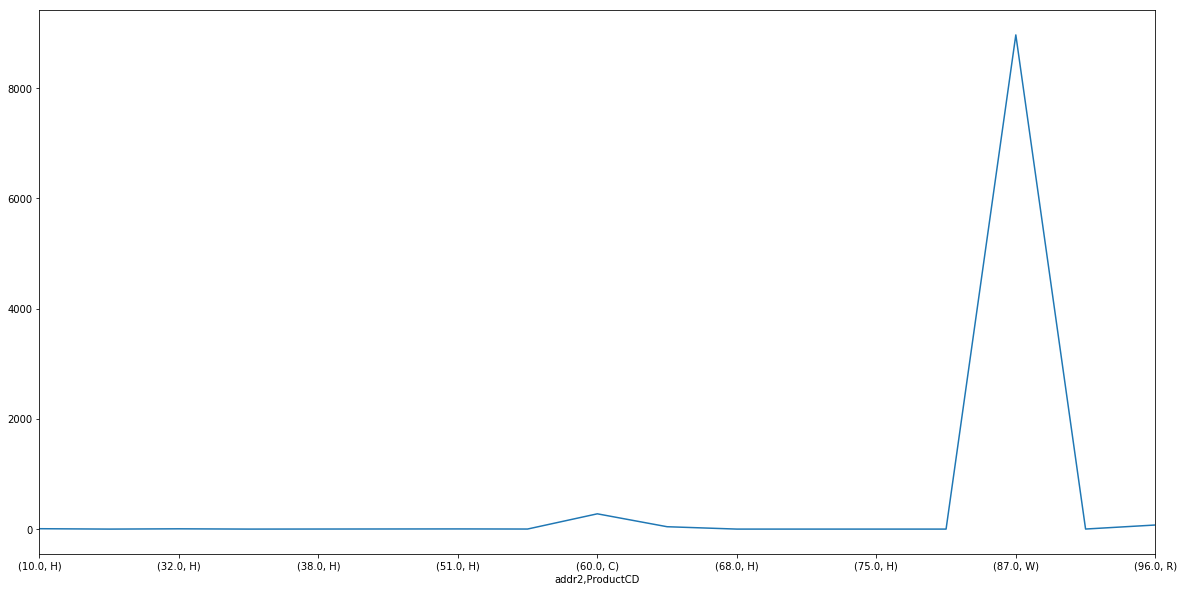

In [0]:
#Part 5
#Interesting fact 1
#Most of the Fraud Transactions in 87.0 country happen between Reference time+ 19h - Reference time+ 23h and also in bween Reference time+ 0h - Reference time+ 2h

freq=SetF['addr2'].value_counts()
x = freq[freq == freq.max()].index[0]
fig, ax1 = plt.subplots(1,figsize=(20, 6))
hours=SetF['TransactionDT']/3600
h=hours%24
RoundedHrs=h.round()
RoundedHrs = RoundedHrs.replace(24.0, 0.0)
sortedv=RoundedHrs.value_counts().sort_index()
sortedv.plot.bar(ax=ax1,title="Distribution of No. of Transactions Vs Hours").set_xlabel("Hours in a Day")
ax1.set_ylabel("No. of Transactions")

#Interesting fact 2
#Most of the fraud in less frequent areas of fraud is done on product H
fig, ax2 = plt.subplots(1,figsize=(20, 6))
addrpr=SetF[['addr2','ProductCD']].dropna()
addrpr=addrpr.groupby('addr2')['ProductCD'].value_counts()
df=pd.DataFrame(addrpr)
df['count']=addrpr.values
idx = df.groupby(['addr2'])['count'].transform(max) == df['count']
MaxCountData=(df[idx])
final=MaxCountData['count']
final.plot(ax=ax2,x='addr2',y='ProductCD',figsize=(20,10))

#Interesting fact 1
​
From the plot between No .of fraud transactions and waking hours we see most of the Fraud Transactions in 87.0(90% of dataset has 87.0 as country) country happen between Reference time+ 19h - Reference time+ 23h and also in bween Reference time+ 0h - Reference time+ 2h
​
#Interesting fact 2
​
From the plot between addr2(billing country) and product Code we can see that most of the fraud in less frequent areas is done on product 'H' .Write your answer here

## Part 6 - Prediction Model

In [0]:
# importing packages required to build the model
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score

#Assigning merged data frame to another data frame replica
replica=merged_set

#removing a column if it has more than 60% NaN Values 
replica = replica.loc[:, replica.isnull().mean() < 0.6]
# Assuming Transaction DT to be seconds modifying values to be in hours for more accuracy
Hours = replica['TransactionDT']/3600 
Hour = Hours%24 
Hour = Hour.round()
Hour = Hour.replace(24.0,0.0) 
replica['TransactionDT'] = Hour

#Using label Encoder for transforming categorical values
le = preprocessing.LabelEncoder()
for column in replica.columns:
    if replica[column].dtype == type(object):
        replica[column].fillna("Not Specified",inplace=True) #filling 'Not specified' in the place of null values
        replica[column] = le.fit_transform(replica[column])
    else:
        replica[column].fillna(replica[column].median(),inplace=True) # filling median values for columns othere than string type.
        
#Normalizing the values of Transaction Amount as part of Data Pre Processing.        
replica['TransactionAmt'] = (replica['TransactionAmt'] - replica['TransactionAmt'].min()) / (replica['TransactionAmt'].max() - replica['TransactionAmt'].min())
#Droping Transaction ID as it is an independent variable.
df=replica.drop(['TransactionID','isFraud'],axis=1)
predicty = replica['isFraud'] #declaring predicty as target variable
#Splitting data into 75% train data 25 % test data
X_train,X_test,y_train,y_test=train_test_split(df,predicty,test_size=0.25)
#using logistic regression classifier and solver as lbfgs
lm = LogisticRegression(solver="lbfgs")
#training the model
model=lm.fit(X_train,y_train)
lm.score(X_test,y_test)
#predicting the values of the test dataset
predictions=lm.predict(X_test)
uniqueval, counts = np.unique(predictions, return_counts=True)
dict(zip(uniqueval, counts))


#Reading test_identity.csv and test_transaction.csv
test_id = pd.read_csv('test_identity.csv')
test_trans = pd.read_csv('test_transaction.csv')
#left merging test_transaction and test_identity
TestData = pd.merge(test_trans,test_id,on='TransactionID',how='left')

#Getting the columns of train set so that there wont be any mismatch of columns
finalTestData = TestData[X_train.columns]

#Performing the same data preprocessing as done on train dataset. 
Hours = finalTestData['TransactionDT']/3600 
Hour = Hours%24 
Hour = Hour.round() 
Hour = Hour.replace(24.0,0.0) 
finalTestData['TransactionDT'] = Hour

le = preprocessing.LabelEncoder()
for column in finalTestData.columns:
    if finalTestData[column].dtype == type(object):
        finalTestData[column].fillna("Not Specified",inplace=True)
        finalTestData[column] = le.fit_transform(finalTestData[column])
    else:
        finalTestData[column].fillna(finalTestData[column].median(),inplace=True)
        
finalTestData['TransactionAmt'] = (finalTestData['TransactionAmt'] - finalTestData['TransactionAmt'].min()) / (finalTestData['TransactionAmt'].max() - finalTestData['TransactionAmt'].min())
#Predictions done with the model that was trained before
predictions=lm.predict(finalTestData)
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))       

np.savetxt("predictions_LR2.csv",predictions,delimiter=",")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/li

**1) Done data preprocessing**

-> Removed columns that have >60% null values

-> Replaced missing string data with Not Specified

-> Replaced missing number values with median value

-> Normalized Transaction Amounts

-> Converted Transaction DT to 24 hr dormat.

-> used Label Encoder() for transforming categorical values

2) Split the model into 75% train set and 25 % Test set

3) Train the model using LogisticRegression(solver='lbfgs')

4)Predicted the test dataset values

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/ravalisambu

Highest Rank: 5773

Score: 0.5006

Number of entries: 2

[Kaggle Rank](https://drive.google.com/file/d/1a9FDsf-gsVuvv3Pozp3GA0gvVegY3xoW/view?usp=sharing)